In [2]:
import pandas as pd
import sqlite3
database = "sqlite_db_pythonsqlite.db"
conn = sqlite3.connect(database)
cursor =conn.cursor()

In [3]:
cursor.execute("select* from Facilities limit 5;")

In [4]:
#Testing the connection
results = cursor.fetchall()
print(results)

[(0, 'Tennis Court 1', 5, 25, 10000, 200), (1, 'Tennis Court 2', 5, 25, 8000, 200), (2, 'Badminton Court', 0, 15.5, 4000, 50), (3, 'Table Tennis', 0, 5, 320, 10), (4, 'Massage Room 1', 9.9, 80, 4000, 3000)]


In [59]:
#Q10: Produce a list of facilities with a total revenue less than 1000. The output of facility name and total revenue, sorted by revenue. Remember
#that there's a different cost for guests and members!

revenue_query = """select name, 
sum(case when memid = 0 then slots*guestcost else slots*membercost end) as 'revenue'
from Bookings inner join Facilities on Bookings.facid = Facilities.facid 
group by name
having revenue < 1000
order by revenue desc;"""
df_revenue = pd.read_sql_query(revenue_query, conn)
df_revenue.head(30)

,name,revenue
0,Pool Table,270
1,Snooker Table,240
2,Table Tennis,180


In [60]:
# Q11: Produce a report of members and who recommended them in alphabetic surname,firstname ord

mem_list =pd.read_sql_query("""select surname, firstname, recommendedby
from Members group by recommendedby order by surname, firstname asc;""", conn)
mem_list.head()

,surname,firstname,recommendedby
0,Baker,Anne,9
1,Baker,Timothy,13
2,Boothe,Tim,3
3,Coplin,Joan,16
4,Dare,Nancy,4


In [61]:
# Q12: Find the facilities with their usage by member, but not guests

facility_usage = pd.read_sql_query("""select facid as facility, count(memid) as member_usage
from Bookings
where memid > 0
group by facility
order by member_usage desc;""", conn)
facid.head()

,facid,member_usage
0,8,783
1,7,421
2,4,421
3,3,385
4,2,344


In [12]:
# Q13: Find the facilities usage by month, but not guests
facility_usage_query = """select facid, bookid as monthly_usage, 
extract(month from starttime) as month from Bookings
where memid > 0
group by month, facid;"""

facility_usage_month = pd.read_sql_query(facility_usage_query, conn)

DatabaseError: Execution failed on sql 'select facid, bookid as monthly_usage, 
extract(month from starttime) as month from Bookings
where memid > 0
group by month, facid;': near "from": syntax error

The query above works well in PhpMyAdmin (see screenshot below) but not here. I have tried the options you proposed here and in PhpmyAmin as well but it seems that I still didnt got the queries right. Please help check out.
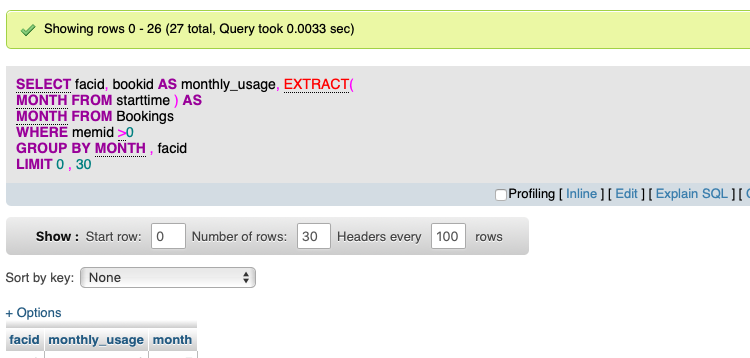


In [13]:
# Alternative code 1 for question 13
facility_usage_query = """"select facid, month, bookid from (select facid, extract(month afrom starttime) as month, bookid from Bookings where memid>0;) t groupby month,facid;"""
facility_usage_month = pd.read_sql_query(facility_usage_query, conn)

DatabaseError: Execution failed on sql '"select facid, month, bookid from (select facid, extract(month afrom starttime) as month, bookid from Bookings where memid>0;) t groupby month,facid;': unrecognized token: ""select facid, month, bookid from (select facid, extract(month afrom starttime) as month, bookid from Bookings where memid>0;) t groupby month,facid;"

In [14]:
# Alternative code 2 for question 13
facility_usage_query = """"select facid, month, bookid from (select facid, extract(month afrom starttime) as month, bookid from Bookings where memid>0;)"""
facility_usage_month = pd.read_sql_query(facility_usage_query, conn)

DatabaseError: Execution failed on sql '"select facid, month, bookid from (select facid, extract(month afrom starttime) as month, bookid from Bookings where memid>0;)': unrecognized token: ""select facid, month, bookid from (select facid, extract(month afrom starttime) as month, bookid from Bookings where memid>0;)"